In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string

In [2]:
df = pd.read_csv("Restaurants Join.csv")


In [3]:
df.shape

(121635, 46)

In [5]:
# sampling the reviews to be able to process the text

df_sample = df.sample(frac=0.25, random_state=1)
df_sample.shape

(30409, 46)

In [7]:
#taking a look at the attributes
df_sample.isna().sum()

business_id                              0
name                                     0
city                                     0
state                                    0
latitude                                 0
longitude                                0
stars                                    0
review_count                             0
is_open                                  0
categories                               0
Industry Sector                          0
attributes.BusinessAcceptsCreditCards    0
attributes.BikeParking                   0
attributes.GoodForKids                   0
attributes.RestaurantsPriceRange2        0
attributes.RestaurantsTakeOut            0
attributes.RestaurantsReservations       0
attributes.RestaurantsGoodForGroups      0
attributes.HasTV                         0
attributes.RestaurantsDelivery           0
attributes.OutdoorSeating                0
attributes.Caters                        0
attribtes.WiFi                           0
review_id  

In [206]:
#Selecting important columns for text analysis and modelling the data
df_select = df_sample[["review_id","stars.x","text","useful","funny","cool","date","review_count"]]
df_select.columns

Index(['review_id', 'stars.x', 'text', 'useful', 'funny', 'cool', 'date',
       'review_count'],
      dtype='object')

In [34]:
# Processing Text and analysing sentiment

'''Make text lowercase, remove text in square 
brackets, remove punctuation and remove words containing numbers.'''
def clean_text_round1(text):
    
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)


'''Get rid of some additional punctuation
 and non-sensical text that was missed the first time around.'''
def clean_text_round2(text):
   
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [207]:
df_P = df_select
df_P['text'] = pd.DataFrame(df_select.text.apply(round1))

<ipython-input-207-69cf93172c39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_P['text'] = pd.DataFrame(df_select.text.apply(round1))


In [208]:
df_P['text'] = pd.DataFrame(df_P.text.apply(round2))

<ipython-input-208-302d9ae43b30>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_P['text'] = pd.DataFrame(df_P.text.apply(round2))


In [209]:
df_P.head(1)

,review_id,stars.x,text,useful,funny,cool,date,review_count
99989,ErNZApvRfKLAY5SU0Msnng,5,couldnt love those donuts any more than i alre...,0,0,0,9/3/2018 18:49,492


In [17]:
#Creating Document Term Matrix

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(df_P.text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = df_P.index
data_dtm

,aa,aaa,aaaaaaaaaaaand,aaaaaaaamazing,aaaaand,aaaaanyway,aaaah,aaaahhhh,aaaamazing,aaahhmazing,...,érica,étaient,était,étions,étouffee,étouffée,été,éxito,ñoquis,über
99989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74180,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90607,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
119035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Now we have one Corpus and one Document term frequency matrix
# We will use it to understand the reviews and perform in depth analysis

In [20]:
from wordcloud import WordCloud
from sklearn.feature_extraction import text

In [21]:
stop_words = text.ENGLISH_STOP_WORDS

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [22]:
plt.rcParams['figure.figsize'] = [16, 6]

Text(0.5, 1.0, 'Restaurant Reviews Word Cloud')

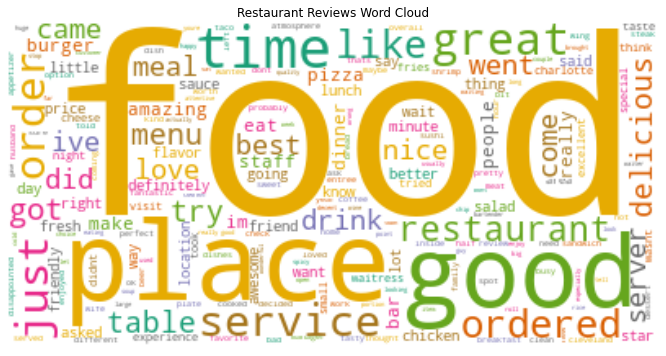

In [23]:
wc.generate(' '.join(df_P['text']))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Restaurant Reviews Word Cloud")

In [333]:
#lets analyze the sentiments and the subjectvity of the reviews
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

In [334]:
df_P['polarity'] = df_P['text'].apply(pol)
df_P['subjectivity'] = df_P['text'].apply(sub)

<ipython-input-334-c71698588299>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_P['polarity'] = df_P['text'].apply(pol)
<ipython-input-334-c71698588299>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_P['subjectivity'] = df_P['text'].apply(sub)


In [41]:
df_P.head(1)

,review_id,stars.x,text,useful,funny,cool,date,polarity,subjectivity
99989,ErNZApvRfKLAY5SU0Msnng,5,couldnt love those donuts any more than i alre...,0,0,0,9/3/2018 18:49,0.316667,0.5


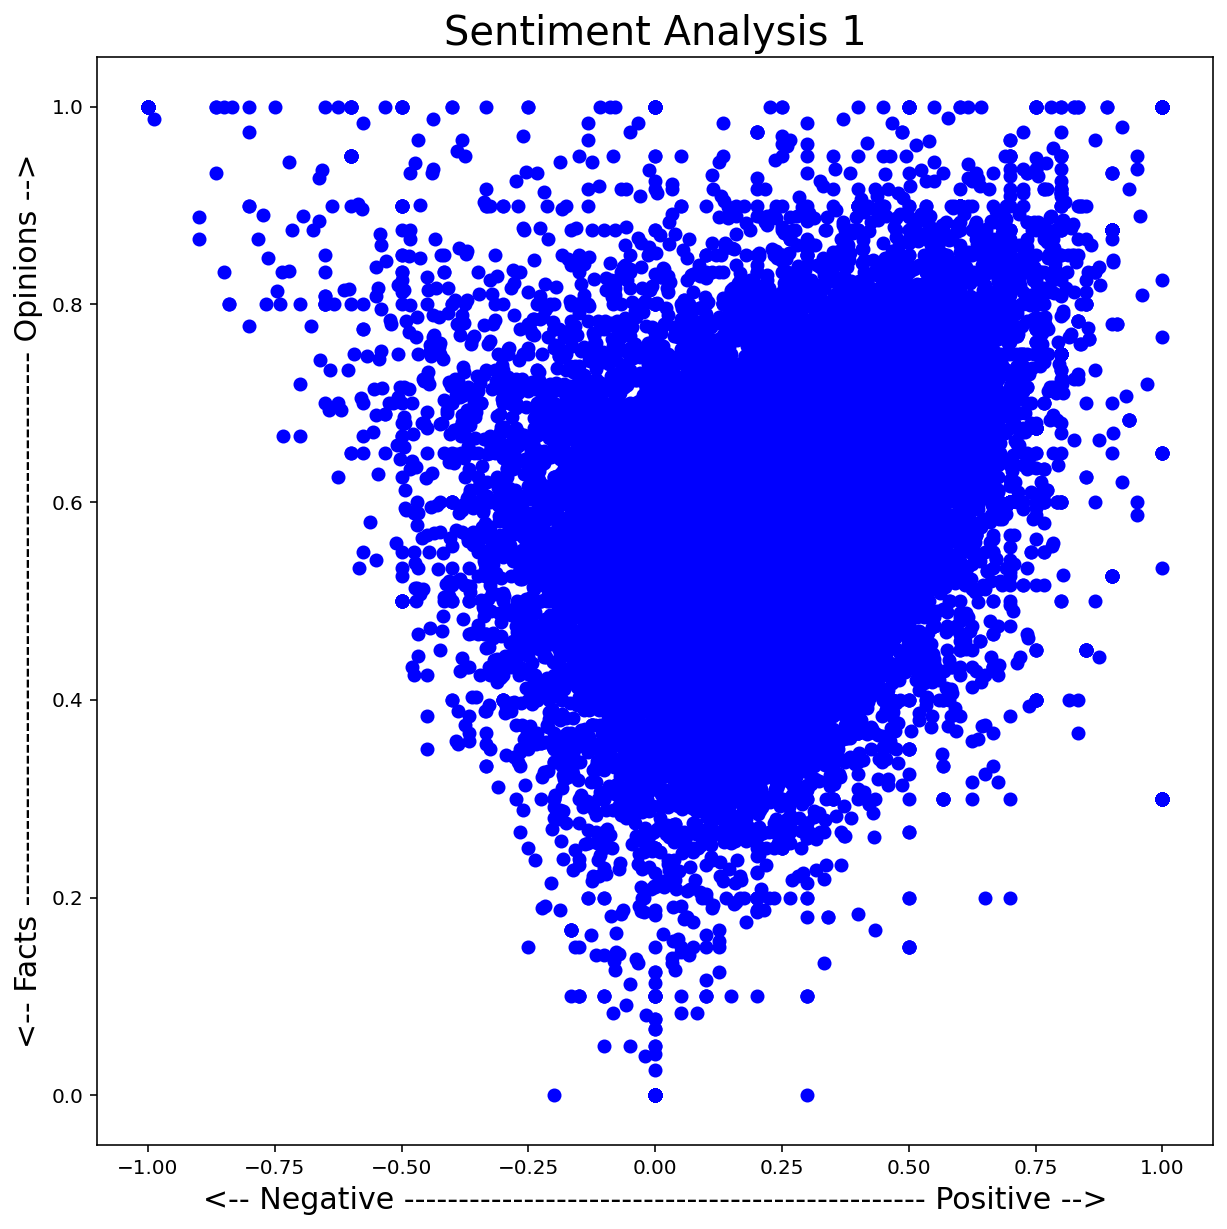

In [336]:
plt.rcParams['figure.figsize'] = [10,10]
x = df_P.polarity
y = df_P.subjectivity
plt.scatter(x, y, color='blue')
plt.title('Sentiment Analysis 1', fontsize=20)
plt.xlabel('<-- Negative ------------------------------------------------ Positive -->', fontsize=15)
plt.ylabel('<-- Facts --------------------------------------------------- Opinions -->', fontsize=15)
plt.show()

In [337]:
df_P.head(1)

,review_id,stars.x,text,useful,funny,cool,date,review_count,polarity,subjectivity
date,,,,,,,,,,
2018-09-03 18:49:00,ErNZApvRfKLAY5SU0Msnng,5,couldnt love those donuts any more than i alre...,0,0,0,2018-09-03 18:49:00,492,0.316667,0.5


In [338]:
df_P.useful.describe()

count    30409.000000
mean         0.962807
std          2.143397
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        121.000000
Name: useful, dtype: float64

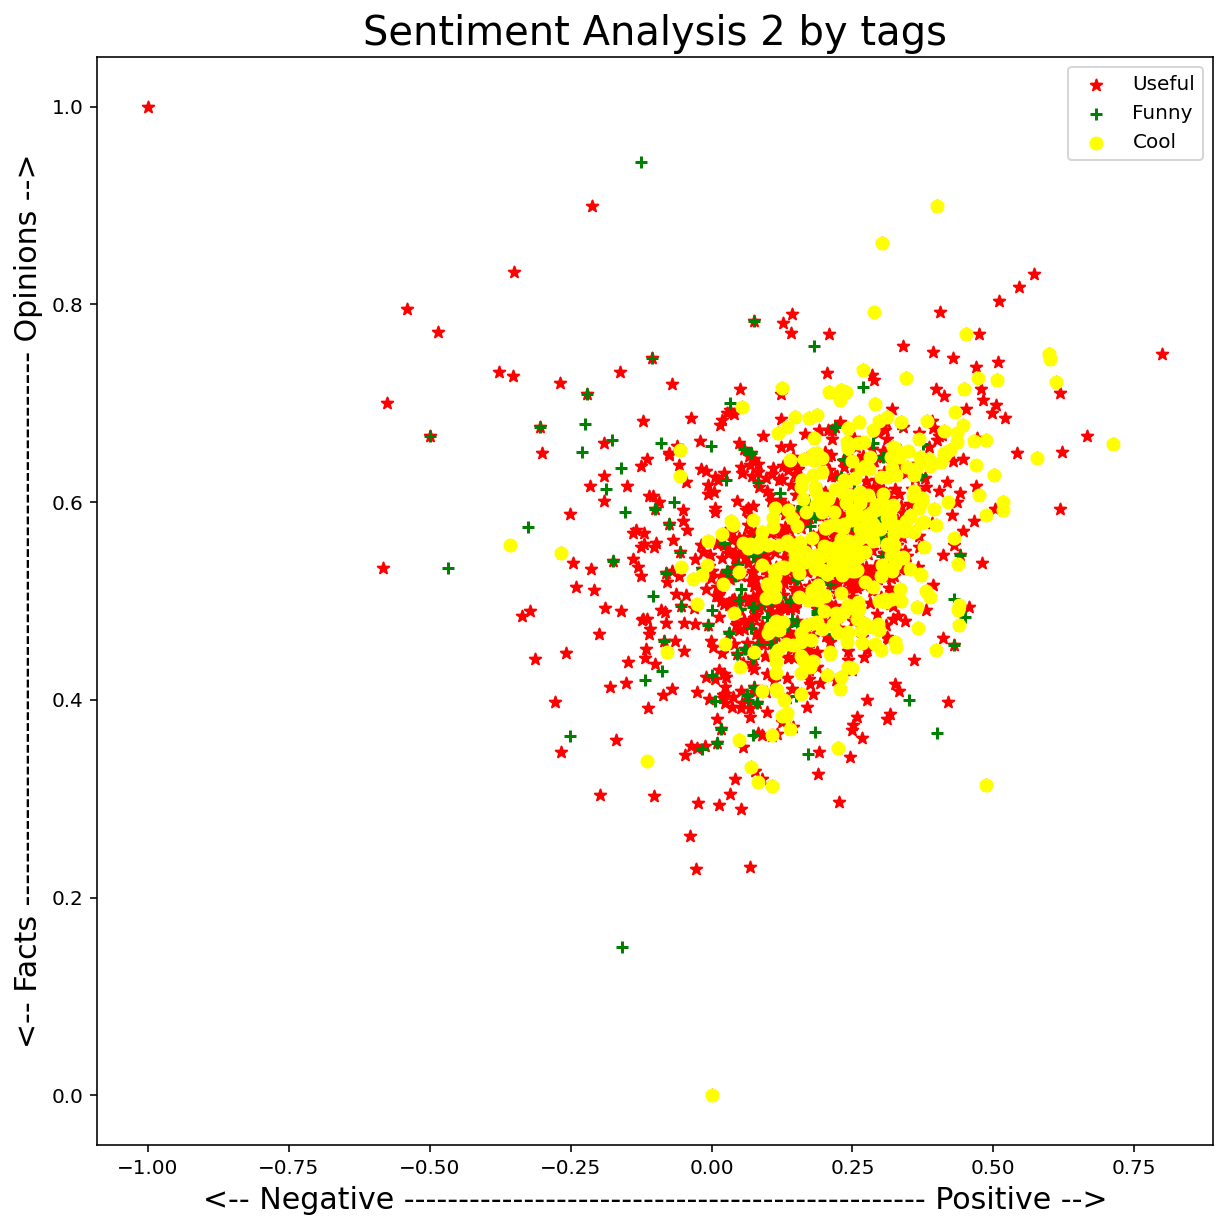

In [341]:
df_P_useful = df_P[df_P['useful']>=5]
df_P_funny = df_P[df_P['funny']>=5]
df_P_cool = df_P[df_P['cool']>=5]

plt.rcParams['figure.figsize'] = [10,10]
x1 = df_P_useful.polarity
y1 = df_P_useful.subjectivity
plt.scatter(x1, y1, color='red',marker = "*",label= 'Useful')
x2 = df_P_funny.polarity
y2 = df_P_funny.subjectivity
plt.scatter(x2, y2, color='green',marker = "+",label= 'Funny')
x3 = df_P_cool.polarity
y3 = df_P_cool.subjectivity
plt.scatter(x3, y3, color='yellow',marker = "o",label='Cool')
plt.legend()
plt.title('Sentiment Analysis 2 by tags', fontsize=20)
plt.xlabel('<-- Negative ------------------------------------------------ Positive -->', fontsize=15)
plt.ylabel('<-- Facts --------------------------------------------------- Opinions -->', fontsize=15)
plt.show()

In [210]:
df_P['date'] = pd.to_datetime(df_P['date'])

<ipython-input-210-15c04f222b68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_P['date'] = pd.to_datetime(df_P['date'])


In [211]:
df_P.dtypes

review_id               object
stars.x                  int64
text                    object
useful                   int64
funny                    int64
cool                     int64
date            datetime64[ns]
review_count             int64
dtype: object

In [212]:
df_P_time = df_P

df_P_time.set_index(df_P_time['date'],inplace=True)
df_P_time.head(1)

,review_id,stars.x,text,useful,funny,cool,date,review_count
date,,,,,,,,
2018-09-03 18:49:00,ErNZApvRfKLAY5SU0Msnng,5,couldnt love those donuts any more than i alre...,0,0,0,2018-09-03 18:49:00,492


In [70]:
#sentiment of the reviews over time

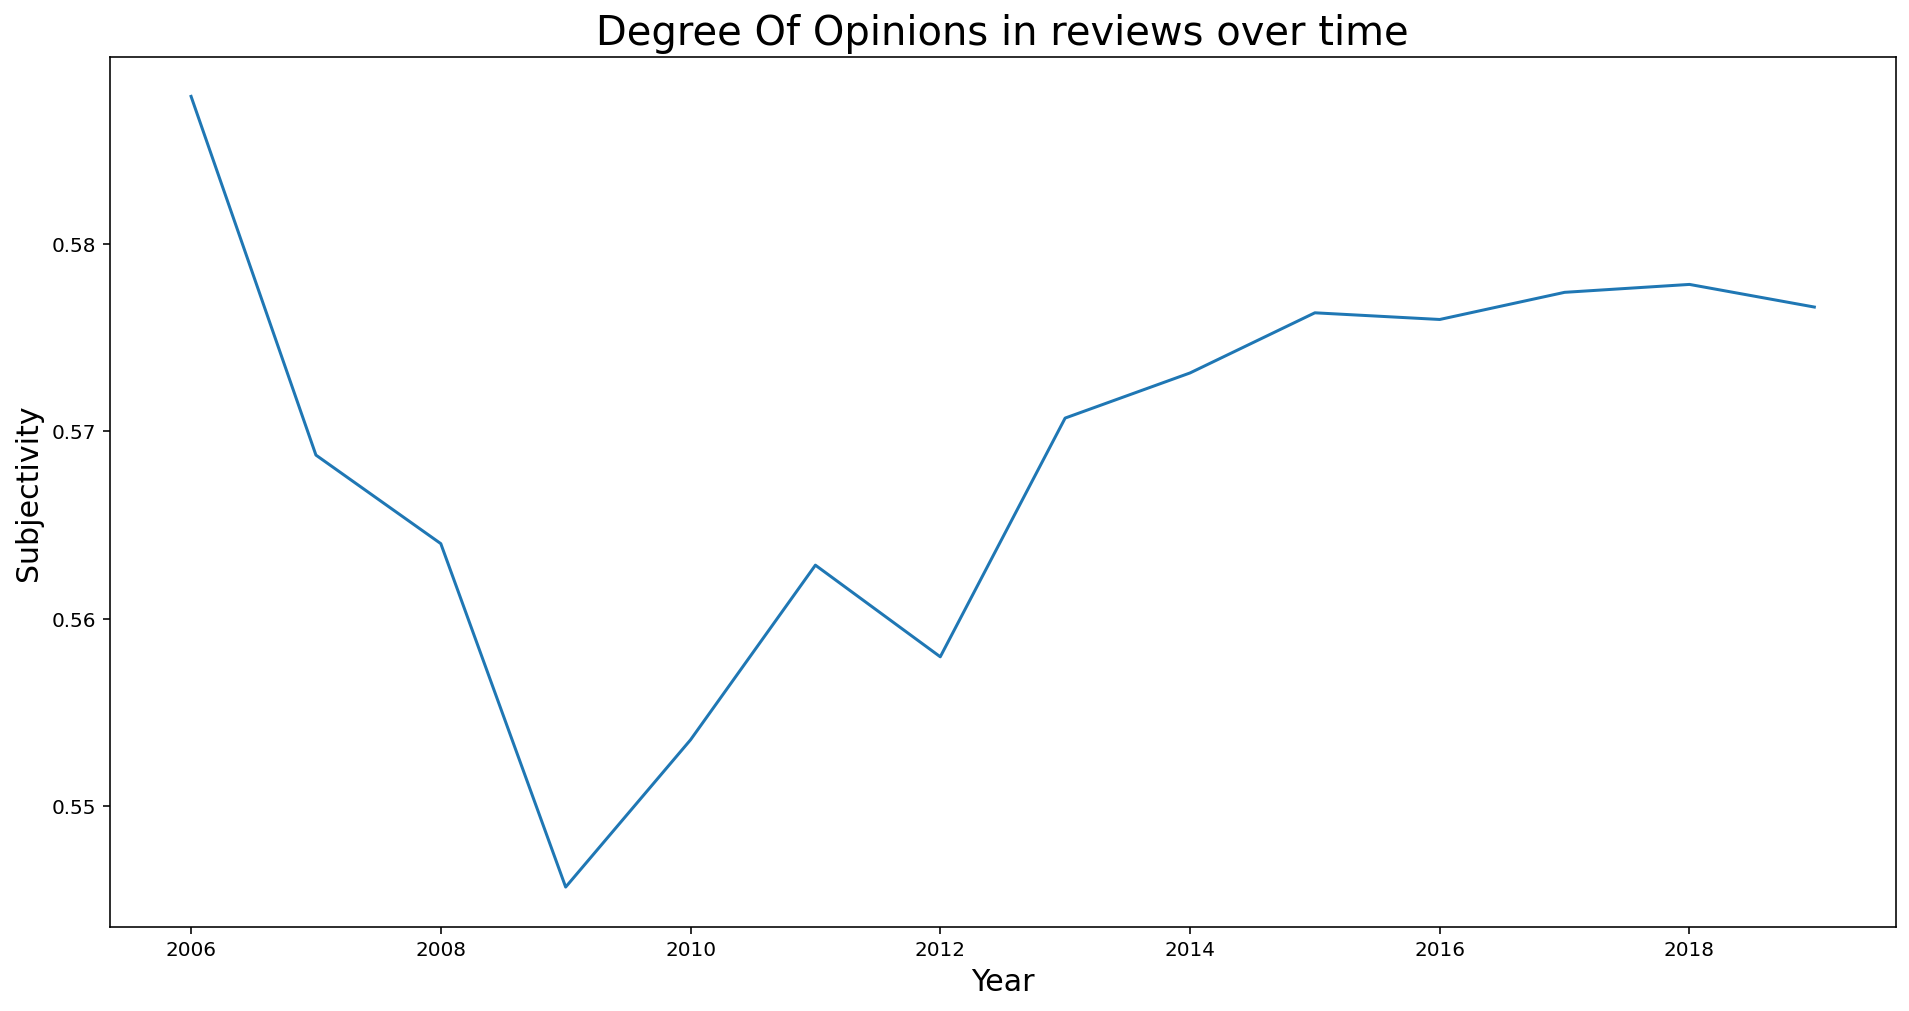

In [353]:
plt.rcParams['figure.figsize'] = [16,8]
a = df_P_time.groupby(df_P_time.index.year)
b=a['subjectivity'].mean()
plt.plot(b[1:])
plt.title('Degree Of Opinions in reviews over time', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Subjectivity', fontsize=15)
plt.show()

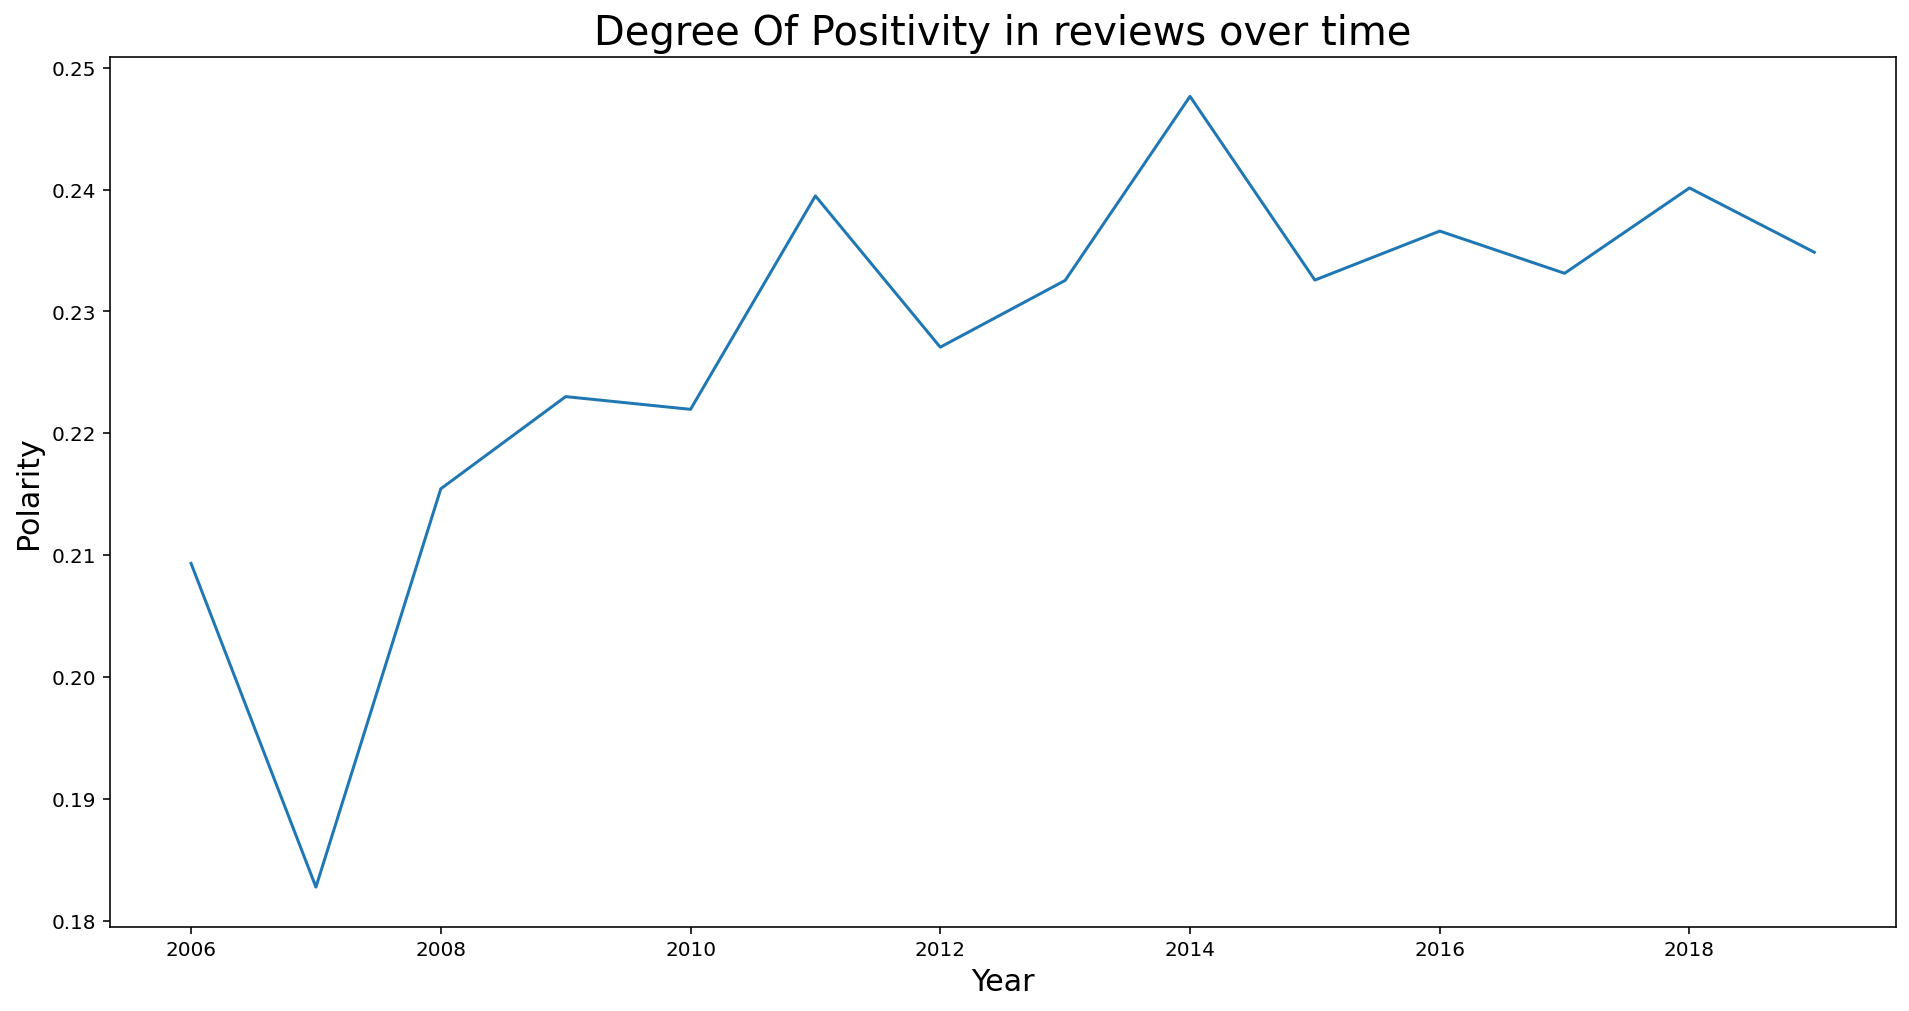

In [354]:
a = df_P_time.groupby(df_P_time.index.year)
b=a['polarity'].mean()
plt.plot(b[1:])
plt.title('Degree Of Positivity in reviews over time', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Polarity', fontsize=15)
plt.show()

In [87]:
!pip install gensim


In [102]:
import nltk
from nltk import word_tokenize, pos_tag
from gensim import matutils, models
import scipy.sparse

E:\ABC\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [97]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [98]:
'''Given a string of text, tokenize the text and pull out only the nouns.'''
def nouns(text):
    
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [99]:
data_nouns = pd.DataFrame(df_P.text.apply(nouns))
data_nouns

,text
date,
2018-09-03 18:49:00,couldnt donuts i problem service wait parking
2014-09-14 13:19:00,im stars place town time cleveland game steakh...
2017-12-11 13:45:00,i place time im area eat lunch marks sushi rol...
2014-07-26 20:31:00,sub chains i jersey mikes none others bread qu...
2019-01-27 18:43:00,bloody orleans sugar cayenne pepper bacon jala...
...,...
2016-08-26 18:24:00,place i city place lunch food place server cyn...
2016-06-06 22:56:00,difference year service menu starters rolls ho...
2019-02-25 16:05:00,market produce youre cute blonde look owner so...


In [100]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im','ive' ,'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.text)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

,aa,aaa,aaaaaaaaaaaand,aaaaand,aaaaanyway,aaaah,aaaahhhh,aac,aaliyah,aards,...,écrit,épouse,érica,était,étions,étouffée,été,éxito,ñoquis,über
date,,,,,,,,,,,,,,,,,,,,,
2018-09-03 18:49:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-09-14 13:19:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-12-11 13:45:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-07-26 20:31:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-27 18:43:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-26 18:24:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-06-06 22:56:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-02-25 16:05:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))


In [104]:
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [131]:
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.033*"place" + 0.023*"food" + 0.015*"beer" + 0.015*"bar" + 0.014*"burger" + 0.011*"menu" + 0.011*"fries" + 0.010*"service" + 0.009*"selection" + 0.008*"coffee"'),
 (1,
  '0.020*"chicken" + 0.019*"food" + 0.017*"place" + 0.014*"pizza" + 0.013*"sauce" + 0.010*"salad" + 0.010*"restaurant" + 0.009*"menu" + 0.008*"flavor" + 0.008*"service"'),
 (2,
  '0.061*"food" + 0.032*"service" + 0.022*"order" + 0.020*"place" + 0.017*"restaurant" + 0.014*"minutes" + 0.013*"table" + 0.011*"server" + 0.011*"staff" + 0.010*"experience"')]

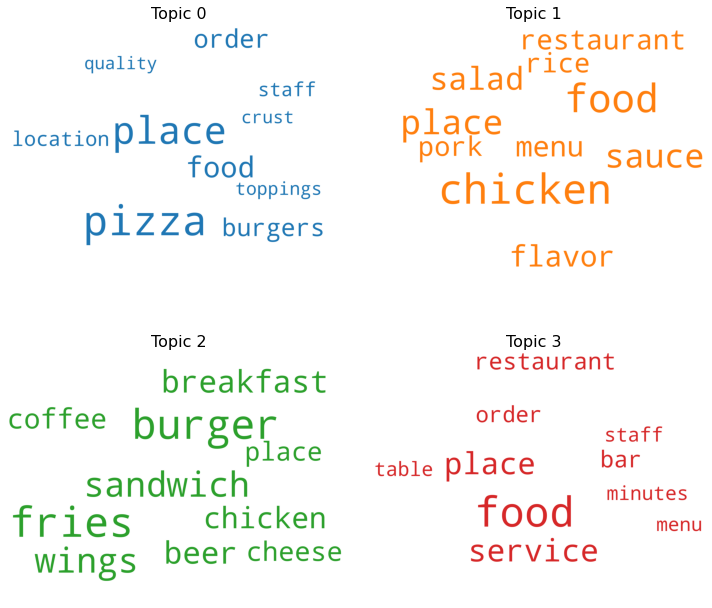

In [130]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldan.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

## Experimenting using the LDA topics distribution as features to predict the sentiment of future reviews

Approach

The data provided to us does not have any labels with respect to the sentiment of the review
We use an innovative approach to deal with whis situation

!LDA states that each document in a corpus is a combination of a fixed number of topics. A 
topic has a probability of generating various words, where the words are all the observed words
in the corpus. These ‘hidden’ topics are then surfaced based on the likelihood of word co-occurrence.
Formally, this is Bayesian Inference problem .

1. Train LDA Model on Restaurant Reviews from 2016
2. Grab Topic distributions for every review using the LDA Model
3. Use Topic Distributions directly as feature vectors in supervised classification models (Logistic Regression, SVC, etc) and get F1-score.
4. Use the same 2016 LDA model to get topic distributions from 2017 (the LDA model did not see this data!)
5. Run supervised classification models again on the 2017 vectors and see if this generalizes.

In [188]:
!pip install spacy



  Using cached spacy-3.0.6-cp38-cp38-win_amd64.whl (11.9 MB)
  Using cached cymem-2.0.5-cp38-cp38-win_amd64.whl (36 kB)
  Using cached murmurhash-1.0.5-cp38-cp38-win_amd64.whl (21 kB)
  Using cached pathy-0.5.2-py3-none-any.whl (42 kB)
  Using cached pydantic-1.7.4-cp38-cp38-win_amd64.whl (1.8 MB)
  Using cached preshed-3.0.5-cp38-cp38-win_amd64.whl (112 kB)
  Using cached catalogue-2.0.4-py3-none-any.whl (16 kB)
  Using cached blis-0.7.4-cp38-cp38-win_amd64.whl (6.5 MB)
  Using cached spacy_legacy-3.0.5-py2.py3-none-any.whl (12 kB)
  Using cached wasabi-0.8.2-py3-none-any.whl (23 kB)
  Using cached srsly-2.4.1-cp38-cp38-win_amd64.whl (451 kB)
  Using cached typer-0.3.2-py3-none-any.whl (21 kB)
  Using cached thinc-8.0.3-cp38-cp38-win_amd64.whl (1.0 MB)
  Using cached smart_open-3.0.0.tar.gz (113 kB)
  Created wheel for smart-open: filename=smart_open-3.0.0-py3-none-any.whl size=107102 sha256=97a5795290ebe122ab8b2f2c171589aabe6f69221d8bfe75a8d178d2ac90c957
  Stored in directory: c:\use

In [191]:
!pip download pyLDAvis

  Using cached pyLDAvis-3.3.1.tar.gz (1.7 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'E:\ABC\python.exe' 'E:\ABC\lib\site-packages\pip' install --ignore-installed --no-user --prefix 'C:\Users\Lenovo\AppData\Local\Temp\pip-build-env-bnjpzo2_\overlay' --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- setuptools
       cwd: None
  Complete output (44 lines):
  Traceback (most recent call last):
    File "E:\ABC\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "E:\ABC\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "E:\ABC\lib\site-packages\pip\__main__.py", line 26, in <module>
      sys.exit(_main())
    File "E:\ABC\lib\site-packages\pip\_internal\cli\main.py", line 73, in main
      command = create_command(cmd_name, isolated=("--isolated" in cmd_args))
    File "E:\ABC\lib\site-packages\pip\_internal\commands\__init__.py", line 104, in create_command
      module = importlib.impo

In [189]:
import gensim
import spacy
import nltk; nltk.download('stopwords')
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
%config InlineBackend.figure_formats = ['retina']
from sklearn.metrics import f1_score
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import fbeta_score
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [164]:
df_P.shape
df_P.head(1)

,review_id,stars.x,text,useful,funny,cool,date,polarity,subjectivity
date,,,,,,,,,
2018-09-03 18:49:00,ErNZApvRfKLAY5SU0Msnng,5,couldnt love those donuts any more than i alre...,0,0,0,2018-09-03 18:49:00,0.316667,0.5


In [213]:
train = df_P_time.loc['2015':'2016']
test = df_P_time.loc['2017'].sample(frac=0.25,random_state= 1)
train.shape, test.shape

((7413, 8), (1139, 8))

In [214]:
train.head(1)

,review_id,stars.x,text,useful,funny,cool,date,review_count
date,,,,,,,,
2016-12-01 19:50:00,VZk7_wrib7dQ1pGN-ENskg,5,yum i come here mainly for the quinoa stuffed ...,1,0,1,2016-12-01 19:50:00,170


In [215]:
train['text_len'] = train['text'].apply(lambda x: len(x.split()))

<ipython-input-215-62907aa9e4f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['text_len'] = train['text'].apply(lambda x: len(x.split()))


In [216]:
train = train[train['stars.x'] != 3.0]

In [217]:
train['target'] = train['stars.x'].apply(lambda x: 1 if x > 3 else 0)

In [218]:
train.head(1)

,review_id,stars.x,text,useful,funny,cool,date,review_count,text_len,target
date,,,,,,,,,,
2016-12-01 19:50:00,VZk7_wrib7dQ1pGN-ENskg,5,yum i come here mainly for the quinoa stuffed ...,1,0,1,2016-12-01 19:50:00,170,153,1


In [235]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['come','order','try','go','get','make','drink','plate','dish','restaurant','place',
                  'would','really','like','great','service','came','got','ive','us','said','asked','didnt','also','one'
                  ,'dont','im','could','should'])

In [236]:
def strip_newline(series):
    return [review.replace('\n','') for review in series]

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [237]:
def bigrams(words, bi_min=15, tri_min=10):
    bigram = gensim.models.Phrases(words, min_count = bi_min)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return bigram_mod

In [238]:
def get_corpus(df):
    """
    Get Bigram Model, Corpus, id2word mapping
    """
    
    df['text'] = strip_newline(df.text)
    words = list(sent_to_words(df.text))
    words = remove_stopwords(words)
    bigram = bigrams(words)
    bigram = [bigram[review] for review in words]
#     lemma = lemmatization(bigram)
    id2word = gensim.corpora.Dictionary(bigram)
    id2word.filter_extremes(no_below=10, no_above=0.35)
    id2word.compactify()
    corpus = [id2word.doc2bow(text) for text in bigram]
    return corpus, id2word, bigram

In [239]:
train_corpus4, train_id2word4, bigram_train4 = get_corpus(train)

In [360]:
bigram_train4[1],bigram_train4[2],bigram_train4[4]

(['long_wait',
  'mediocre',
  'food',
  'expecting',
  'lot',
  'better',
  'drinks',
  'sweet',
  'waited',
  'hour',
  'couple',
  'tacos',
  'disappointed'],
 ['food',
  'staff',
  'always',
  'enjoy',
  'going',
  'brooklyn',
  'never',
  'mistakes',
  'issues',
  'always',
  'excellent',
  'time',
  'highly_recommend'],
 ['fantastic',
  'lover',
  'indian_food',
  'often',
  'dinner',
  'never_disappointed',
  'food',
  'delicious',
  'staff',
  'incredibly',
  'friendly'])

In [240]:
import warnings


In [241]:
import logging
logging.basicConfig(filename='lda_model.log', format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    lda_train4 = gensim.models.ldamulticore.LdaMulticore(
                           corpus=train_corpus4,
                           num_topics=10,
                           id2word=train_id2word4,
                           chunksize=100,
                           workers=7, # Num. Processing Cores - 1
                           passes=50,
                           eval_every = 1,
                           per_word_topics=True)
    lda_train4.save('lda_train4.model')

In [242]:
lda_train4.print_topics()


[(0,
  '0.022*"menu" + 0.015*"nice" + 0.014*"amazing" + 0.013*"delicious" + 0.013*"excellent" + 0.013*"atmosphere" + 0.011*"beer" + 0.008*"wonderful" + 0.008*"definitely" + 0.008*"well"'),
 (1,
  '0.038*"wings" + 0.037*"best" + 0.032*"love" + 0.022*"always" + 0.021*"amazing" + 0.021*"charlotte" + 0.020*"delicious" + 0.016*"town" + 0.015*"buffet" + 0.014*"awesome"'),
 (2,
  '0.011*"always" + 0.011*"location" + 0.009*"going" + 0.008*"business" + 0.007*"fast" + 0.007*"staff" + 0.007*"customer" + 0.006*"people" + 0.005*"line" + 0.005*"years"'),
 (3,
  '0.038*"chicken" + 0.017*"sauce" + 0.014*"salad" + 0.014*"ordered" + 0.013*"flavor" + 0.011*"rice" + 0.009*"spicy" + 0.009*"fried" + 0.009*"soup" + 0.007*"taste"'),
 (4,
  '0.012*"pizza" + 0.012*"never" + 0.011*"ordered" + 0.010*"bad" + 0.009*"even" + 0.007*"better" + 0.007*"ever" + 0.007*"back" + 0.006*"cold" + 0.006*"first"'),
 (5,
  '0.013*"time" + 0.013*"table" + 0.012*"back" + 0.010*"minutes" + 0.009*"waitress" + 0.009*"server" + 0.008*"

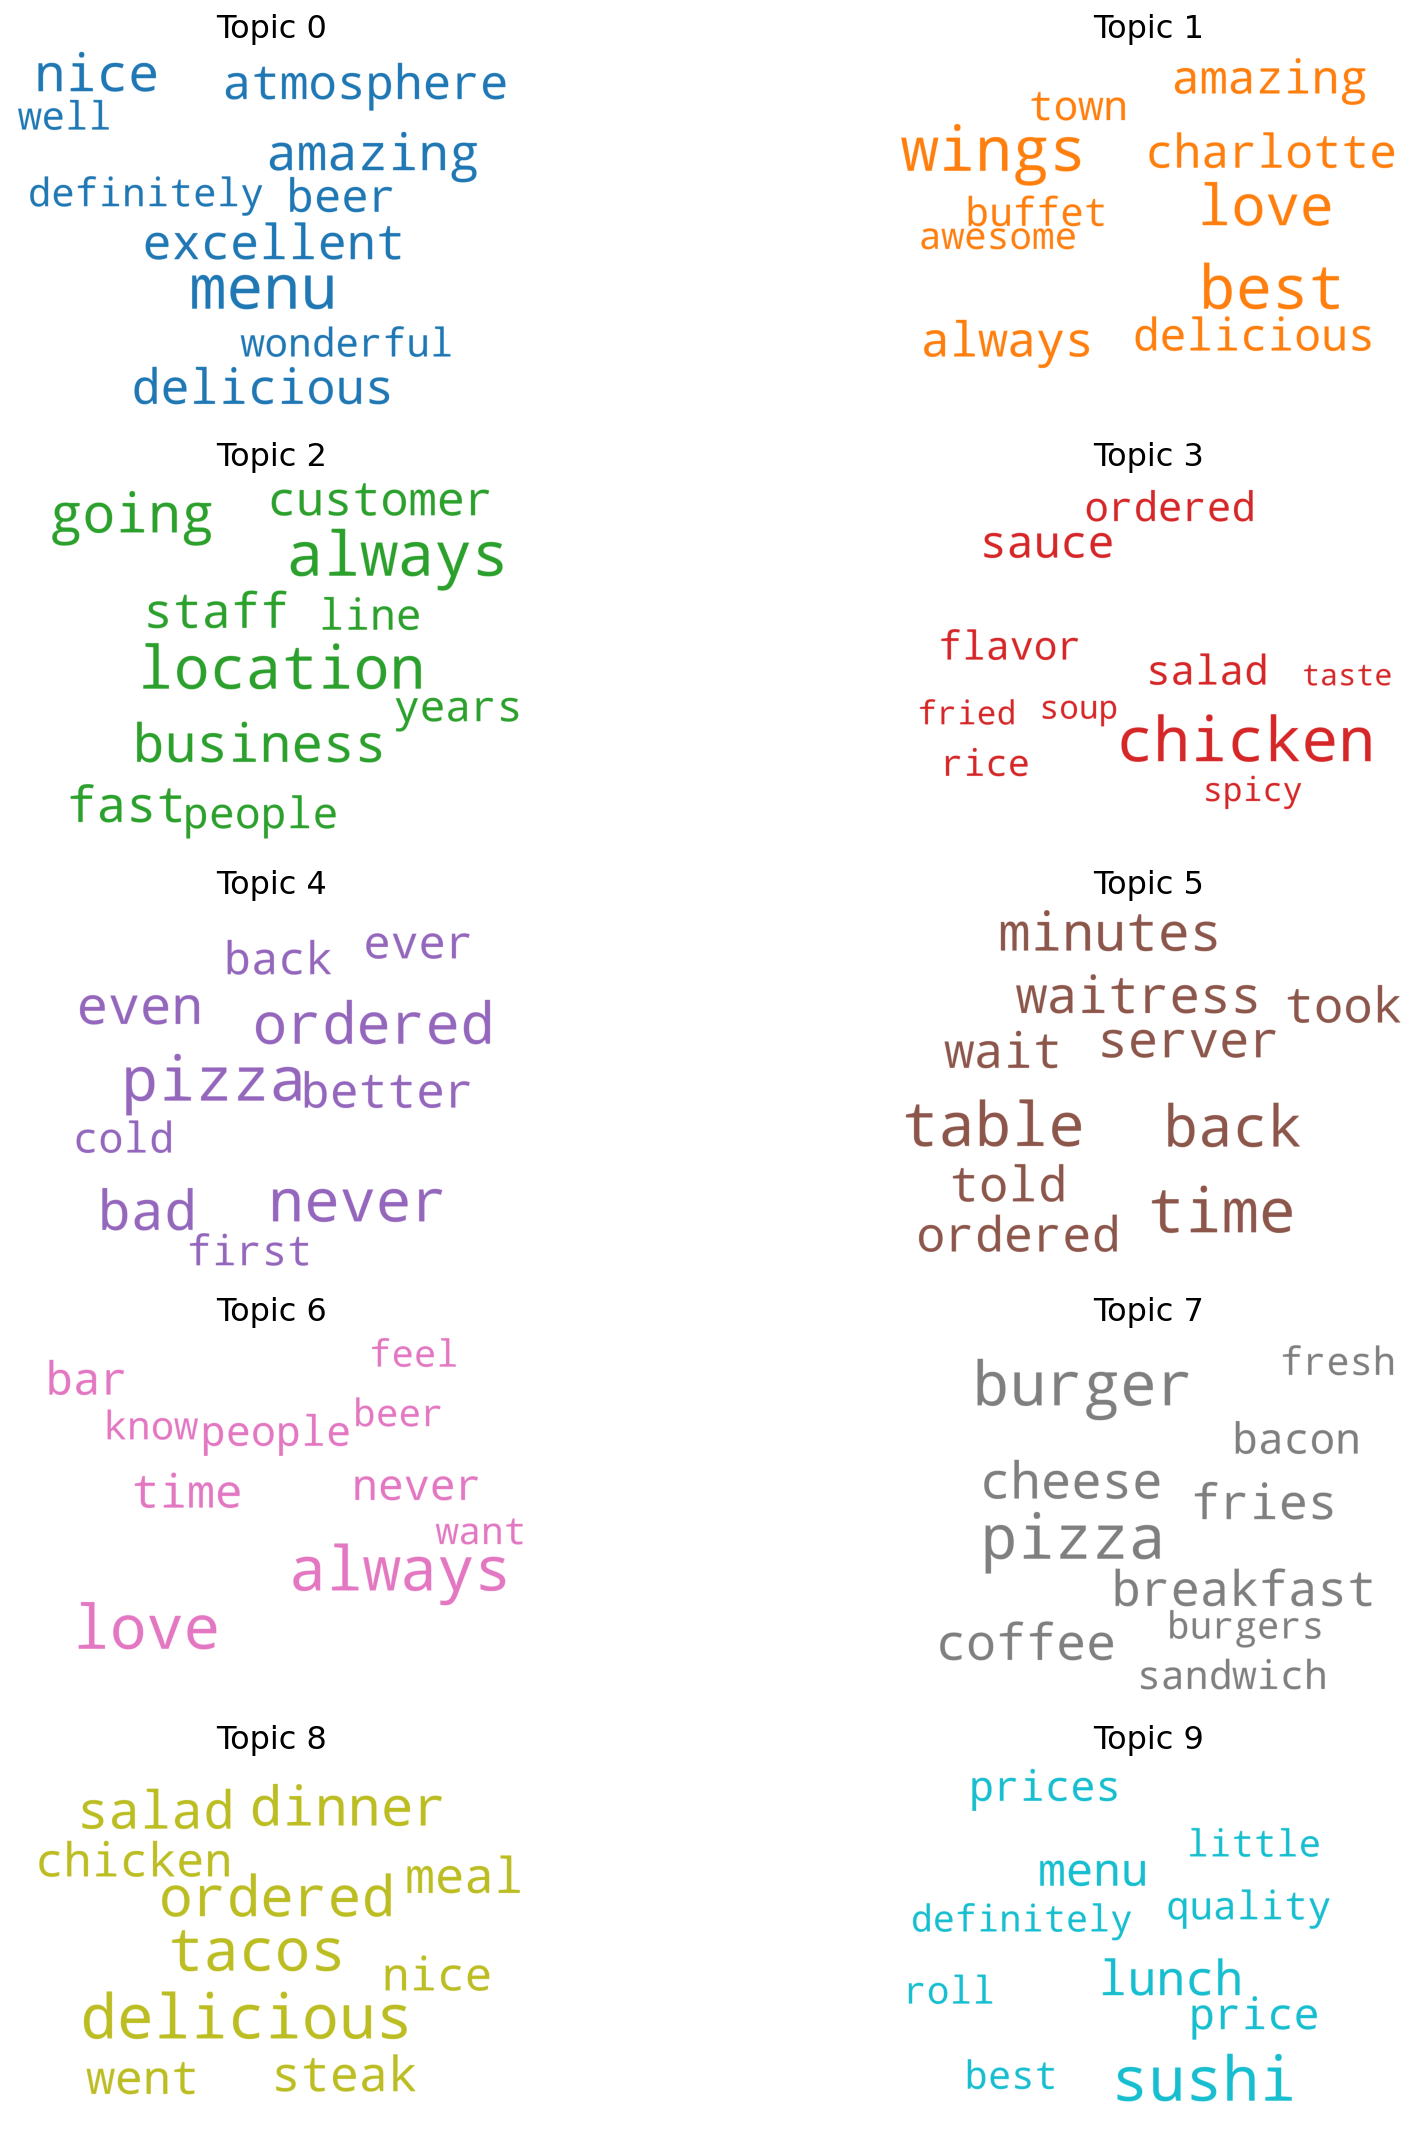

In [362]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_train4.show_topics(formatted=False)

fig, axes = plt.subplots(5, 2, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [365]:
train_vecs = []

for i in range(len(train)):
    top_topics = lda_train4.get_document_topics(train_corpus4[i], minimum_probability=0.0)
    topic_vec = [top_topics[i][1] for i in range(10)]
    topic_vec.extend([train.iloc[i].review_count]) # counts of reviews for restaurant
    topic_vec.extend([len(train.iloc[i].text)]) # length review
    train_vecs.append(topic_vec)

In [385]:
train_vecs[3], train.target.unique()

([0.0071467333,
  0.007145355,
  0.007145492,
  0.007145499,
  0.74950856,
  0.19332577,
  0.0071464144,
  0.0071452893,
  0.0071454775,
  0.007145413,
  106,
  181],
 array([1, 0], dtype=int64))

In [367]:
X =  np.array(train_vecs)
y = np.array(train.target)

In [368]:
kf = KFold(5, shuffle=True, random_state=42)
cv_lr_f1, cv_lrsgd_f1, cv_svcsgd_f1,  = [], [], []

for train_ind, val_ind in kf.split(X, y):
    # Assign CV IDX
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind]
    
    # Scale Data
    scaler = StandardScaler()
    X_train_scale = scaler.fit_transform(X_train)
    X_val_scale = scaler.transform(X_val)

    # Logisitic Regression
    lr = LogisticRegression(
        class_weight= 'balanced',
        solver='newton-cg',
        fit_intercept=True
    ).fit(X_train_scale, y_train)

    y_pred = lr.predict(X_val_scale)
    cv_lr_f1.append(f1_score(y_val, y_pred, average='binary'))
    
    # Logistic Regression Mini-Batch SGD
    sgd = linear_model.SGDClassifier(
        max_iter=1000,
        tol=1e-3,
        loss='log',
        class_weight='balanced'
    ).fit(X_train_scale, y_train)
    
    y_pred = sgd.predict(X_val_scale)
    cv_lrsgd_f1.append(f1_score(y_val, y_pred, average='binary'))
    
    # SGD Modified Huber
    sgd_huber = linear_model.SGDClassifier(
        max_iter=1000,
        tol=1e-3,
        alpha=20,
        loss='modified_huber',
        class_weight='balanced'
    ).fit(X_train_scale, y_train)
    
    y_pred = sgd_huber.predict(X_val_scale)
    cv_svcsgd_f1.append(f1_score(y_val, y_pred, average='binary'))

print(f'Logistic Regression Val f1: {np.mean(cv_lr_f1):.3f} +- {np.std(cv_lr_f1):.3f}')
print(f'Logisitic Regression SGD Val f1: {np.mean(cv_lrsgd_f1):.3f} +- {np.std(cv_lrsgd_f1):.3f}')
print(f'SVM Huber Val f1: {np.mean(cv_svcsgd_f1):.3f} +- {np.std(cv_svcsgd_f1):.3f}')

Logistic Regression Val f1: 0.903 +- 0.007
Logisitic Regression SGD Val f1: 0.897 +- 0.011
SVM Huber Val f1: 0.168 +- 0.335


In [369]:
scores = [round(np.mean(cv_lr_f1),3),round(np.mean(cv_lrsgd_f1),3),round(np.mean(cv_svcsgd_f1),3)]
model = ['Logistic Regression', 'Logistic Regression(Stochastic Gradient Descent)','SGD using huberloss']

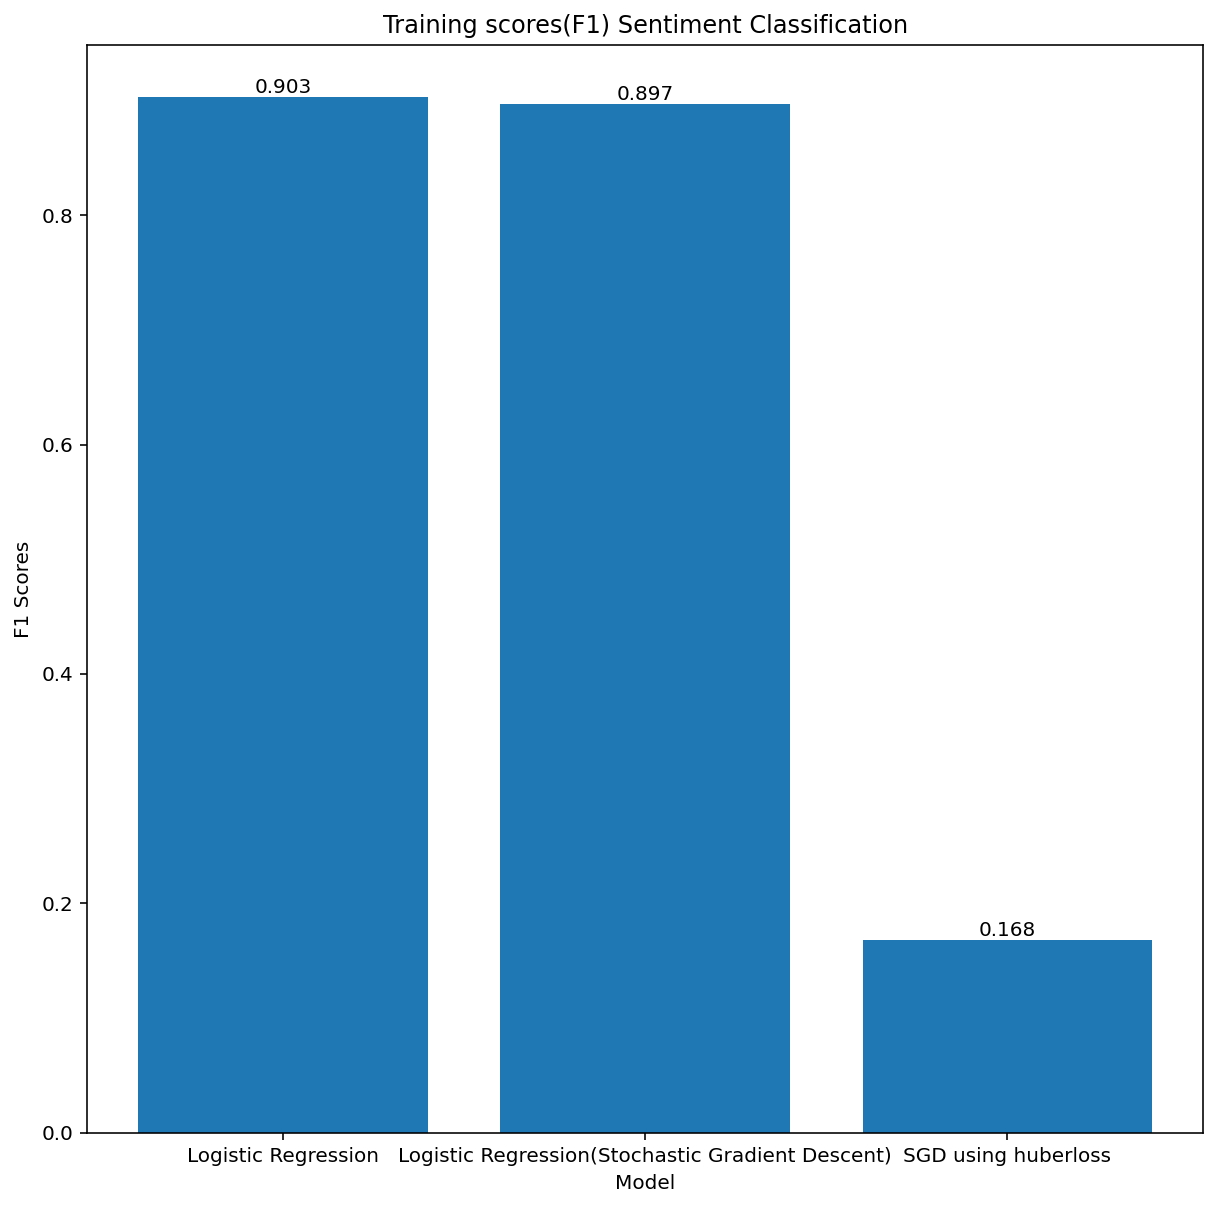

In [370]:
plt.rcParams['figure.figsize'] = [10,10]
plt.bar(model,scores)
plt.xlabel("Model")
plt.ylabel('F1 Scores')
plt.title("Training scores(F1) Sentiment Classification")
for i in range(len(model)):
    plt.annotate(scores[i], xy=(model[i],scores[i]), ha='center', va='bottom')


In [371]:
#testing on unseen data

In [372]:
test['text_len'] = test['text'].apply(lambda x: len(x.split()))

In [373]:
test = test[test['stars.x'] != 3.0]

In [374]:
test['target'] = test['stars.x'].apply(lambda x: 1 if x > 3 else 0)

In [375]:
def get_bigram(df):
    """
    For the test data we only need the bigram data built on 2017 reviews,
    as we'll use the 2016 id2word mappings. This is a requirement due to 
    the shapes Gensim functions expect in the test-vector transformation below.
    With both these in hand, we can make the test corpus.
    """
    df['text'] = strip_newline(df.text)
    words = list(sent_to_words(df.text))
    words = remove_stopwords(words)
    bigram = bigrams(words)
    bigram = [bigram[review] for review in words]
#     lemma = lemmatization(bigram)
    return bigram

In [376]:
bigram_test = get_bigram(test)

In [377]:

# LOAD IN THE TRAIN LDA MODEL
lda_train41 = gensim.models.ldamulticore.LdaMulticore.load('lda_train4.model')

In [378]:
test_corpus = [train_id2word4.doc2bow(text) for text in bigram_test]

In [379]:
test_vecs = []

for i in range(len(test)):
    top_topics = lda_train41.get_document_topics(test_corpus[i], minimum_probability=0.0)
    topic_vec = [top_topics[i][1] for i in range(10)]
    topic_vec.extend([test.iloc[i].review_count]) # counts of reviews for restaurant
    topic_vec.extend([len(test.iloc[i].text)]) # length review
    test_vecs.append(topic_vec)

In [380]:
test_vecs[1]

[0.006251871,
 0.006255533,
 0.28915402,
 0.0062526437,
 0.4557223,
 0.006254058,
 0.006254701,
 0.0062521,
 0.006251955,
 0.21135081,
 31,
 192]

In [384]:
X1 = np.array(test_vecs)
y1 = np.array(test.target)
y1[1]

1

In [382]:
ss = StandardScaler()
X1 = ss.fit_transform(X1)

lr = LogisticRegression(
  class_weight= 'balanced',
  solver='newton-cg',
  fit_intercept=True
  ).fit(X1, y1)

y_pred_lr = lr.predict(X1)
print(f1_score(y1, y_pred_lr,average='binary'))


0.9052333804809052


Text(0.5, 1.0, 'Confusion Matrix (LR Model Evaluation unseen data)')

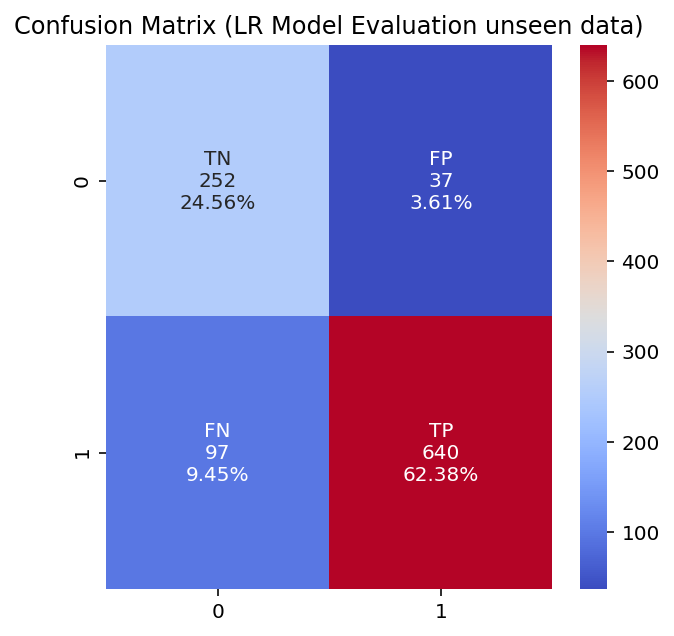

In [383]:
plt.rcParams['figure.figsize'] = [5,5]
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y1, y_pred_lr)

group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='coolwarm')
plt.title("Confusion Matrix (LR Model Evaluation unseen data)")